# PROJETO IMOBILIÁRIA
## Análise de dados de imóveis da cidade do Rio de Janeiro

### Curso Pandas: conhecendo a biblioteca - Alura

##### Pandas = PANel DAta
##### Série: conjunto de dados unidimensional (objeto do tipo array com um eixo de rótulos, também chamado de índice/index, que permite a identificação de cada registro). Podemos pensar nas séries como uma única coluna de uma planilha do Excel ou uma tabela de SQL.
##### DataFrame: objetos bidimensionais (tabela) com eixos de rótulos (linhas e colunas) de tamanho variado. Podemos pensar em um DataFrame como uma planilha de Excel ou uma tabela de SQL.

## 1. Importando a base de dados

In [1]:
import pandas as pd

In [4]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep = ';')

In [5]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [6]:
dados.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [7]:
type(dados)

pandas.core.frame.DataFrame

## 2. Informações gerais sobre a base de dados

In [9]:
dados.shape

(32960, 9)

In [11]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [12]:
dados.dtypes # tipos de dados de cada coluna

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [14]:
dados.info() # informações gerais sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [17]:
dados.Tipo

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [18]:
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [19]:
dados[['Quartos', 'Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


## 3. Análise exploratória de dados

### 3.1. Qual o valor médio de aluguel por tipo de imóvel?

In [20]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [28]:
# dados.groupby('Tipo')['Valor'].mean() # agrupando por tipo e calculando a média do valor
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().round(2).sort_values(by='Valor') # colchetes duplos para retornar um DataFrame
df_preco_tipo

,Valor
Tipo,
Quitinete,1246.84
Pousada/Chalé,1480.00
Casa de Vila,1574.37
Box/Garagem,1899.76
Studio,2400.00
Loft,2557.88
Flat,4546.19
Apartamento,4744.61
Chácara,4900.00


##### O método groupby() agrupa os dados conforme o critério especificado e, em seguida, aplica uma operação ao grupo.

<Axes: ylabel='Tipo'>

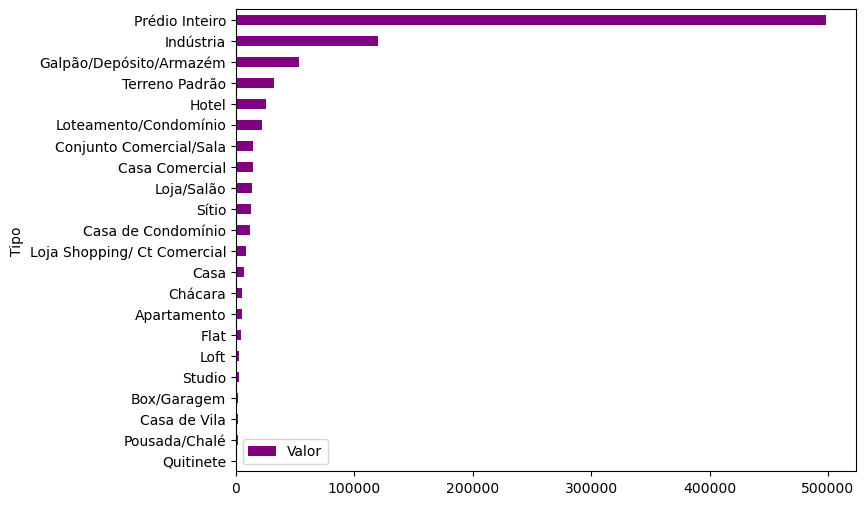

In [38]:
df_preco_tipo.plot(kind='barh', figsize=(8,6), color='purple')

#### Removendo os imóveis comerciais

In [39]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [46]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

dados.query('Tipo not in @imoveis_comerciais', inplace=True)

In [47]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [48]:
df = dados.query('@imoveis_comerciais not in Tipo')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [49]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

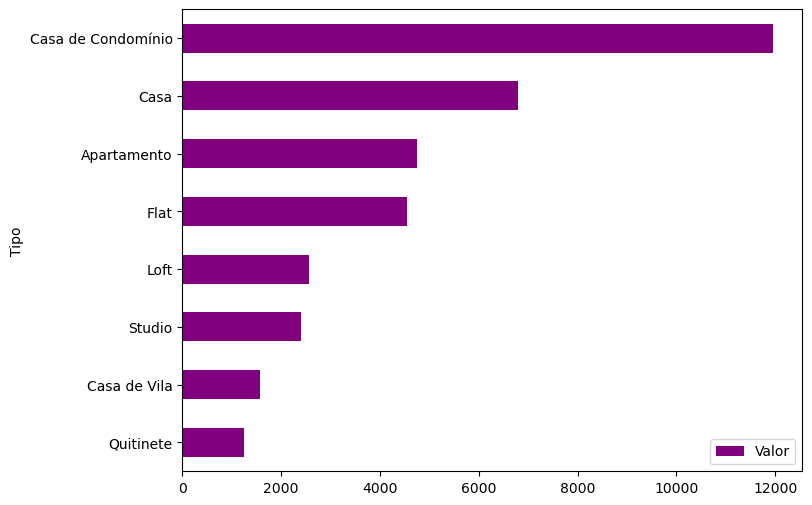

In [52]:
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().round(2).sort_values(by='Valor')
df_preco_tipo.plot(kind='barh', figsize=(8,6), color='purple')

### 3.2. Percentual de cada tipo de imóvel na base de dados

In [72]:
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values(by='proportion')
df_percentual_tipo

,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


<Axes: title={'center': 'Percentual de cada tipo de imóvel na base de dados'}, xlabel='Tipo de imóvel', ylabel='Percentual'>

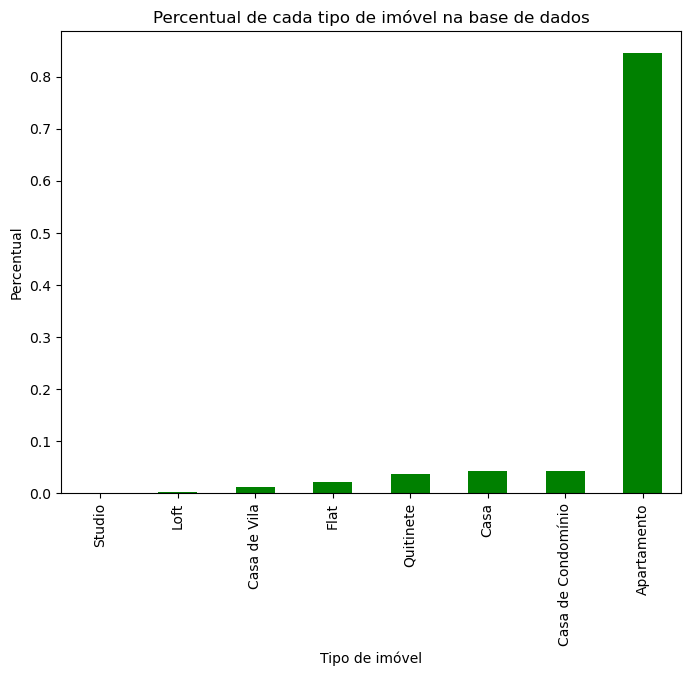

In [74]:
df_percentual_tipo.plot(kind='bar', figsize=(8,6), color='green', xlabel='Tipo de imóvel', ylabel='Percentual', title='Percentual de cada tipo de imóvel na base de dados', legend=False)

#### Selecionando apenas imóveis do tipo apartamento

In [76]:
df_apartamento = df.query('Tipo == "Apartamento"')
df_apartamento.size

175788